DATA

In [1]:
import tensorflow as tf
from visualize_activations import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape, "x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


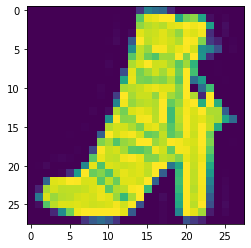

In [3]:
 plt.imshow(x_train[11])

In [4]:
x_train=x_train/255
x_test=x_test/255

In [5]:
y_train=tf.keras.utils.to_categorical(y_train, num_classes=10, dtype="float32")
y_test=tf.keras.utils.to_categorical(y_test, num_classes=10, dtype="float32")

In [6]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
x_train=np.expand_dims(x_train,axis=3);
x_test=np.expand_dims(x_test,axis=3);
x_validation=np.expand_dims(x_validation,axis=3)
print("x_train shape:", x_train.shape, "x_test shape:", x_test.shape,"x_validation shape:", x_validation.shape)

x_train shape: (48000, 28, 28, 1) x_test shape: (10000, 28, 28, 1) x_validation shape: (12000, 28, 28, 1)


MLP

In [8]:
model = tf.keras.Sequential(name="MLP_Early")
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
print("model shape:", model.output_shape)

model shape: (None, 784)


In [9]:
model.add(tf.keras.layers.Dense(32, activation="relu", name="Dense_32"))
print("model shape:", model.output_shape)
model.add(tf.keras.layers.Dense(64, activation="relu", name="Dense_64"))
print("model shape:", model.output_shape)

model shape: (None, 32)
model shape: (None, 64)


In [10]:
model.add(tf.keras.layers.Dense(10,activation="softmax",name="Softmax_10"))
print("model shape:", model.output_shape)

model shape: (None, 10)


In [ ]:
model.summary()

In [11]:
callback=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [12]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)
model.compile(optimizer=opt, loss="categorical_crossentropy")
history=model.fit(x=x_train,y=y_train,epochs=200,batch_size=200,callbacks=[callback],validation_data=(x_validation,y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 2s 37us/sample - loss: 0.7565 - val_loss: 0.5079
Epoch 2/200
48000/48000 [==============================] - 1s 24us/sample - loss: 0.4576 - val_loss: 0.4386
Epoch 3/200
48000/48000 [==============================] - 1s 26us/sample - loss: 0.4136 - val_loss: 0.4089
Epoch 4/200
48000/48000 [==============================] - 1s 24us/sample - loss: 0.3918 - val_loss: 0.3945
Epoch 5/200
48000/48000 [==============================] - 1s 25us/sample - loss: 0.3669 - val_loss: 0.4068
Epoch 6/200
48000/48000 [==============================] - 1s 25us/sample - loss: 0.3518 - val_loss: 0.3814
Epoch 7/200
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3422 - val_loss: 0.3625
Epoch 8/200
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3301 - val_loss: 0.3583
Epoch 9/200
48000/48000 [==============================] - 1s 24us/sample - loss: 0.32

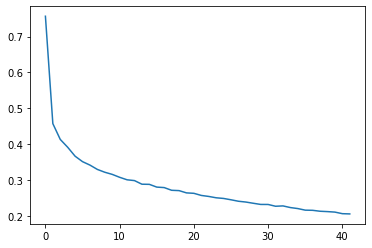

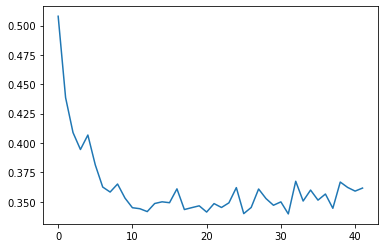

In [13]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.figure(2)
plt.plot(history.history['val_loss'])

In [14]:
y_prediction=model.predict(x=x_test,batch_size=200,callbacks=[callback])
y_prediction=np.argmax(y_prediction, axis=1)
y_prediction=tf.keras.utils.to_categorical(y_prediction, num_classes=10, dtype="float32")
print("Accuracy score:", accuracy_score(y_test, y_prediction),"\n","Confusion Matrix:",confusion_matrix(y_test.argmax(axis=1), y_prediction.argmax(axis=1)))

Accuracy score: 0.8757 
 Confusion Matrix: [[780   1  20  34   2   2 150   1  10   0]
 [  2 969   2  16   5   0   4   0   2   0]
 [ 12   0 829  11  85   0  61   0   2   0]
 [ 19  12  19 885  21   0  40   0   4   0]
 [  0   0 110  37 784   0  68   0   1   0]
 [  0   0   0   0   0 938   0  34   2  26]
 [100   1 106  26  62   0 692   0  13   0]
 [  0   0   0   0   0  16   0 966   1  17]
 [  2   0   6   6   4   2   2   5 973   0]
 [  0   0   0   0   0   8   1  50   0 941]]


REPETITION

In [15]:
model2 = tf.keras.Sequential(name="MLP_NoEarly")
model2.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
print("model2 shape:", model2.output_shape)

model2 shape: (None, 784)


In [16]:
model2.add(tf.keras.layers.Dense(32, activation="relu", name="Dense_32"))
print("model2 shape:", model2.output_shape)
model2.add(tf.keras.layers.Dense(64, activation="relu", name="Dense_64"))
print("model2 shape:", model2.output_shape)

model2 shape: (None, 32)
model2 shape: (None, 64)


In [17]:
model2.add(tf.keras.layers.Dense(10,activation="softmax",name="Softmax_10"))
print("model2 shape:", model2.output_shape)

model2 shape: (None, 10)


In [ ]:
model2.summary()

In [18]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)
model2.compile(optimizer=opt, loss="categorical_crossentropy")
history=model2.fit(x=x_train,y=y_train,epochs=200,batch_size=200,validation_data=(x_validation,y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 2s 43us/sample - loss: 0.7600 - val_loss: 0.5268
Epoch 2/200
48000/48000 [==============================] - 1s 28us/sample - loss: 0.4618 - val_loss: 0.4396
Epoch 3/200
48000/48000 [==============================] - 1s 26us/sample - loss: 0.4179 - val_loss: 0.4236
Epoch 4/200
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3908 - val_loss: 0.3939
Epoch 5/200
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3732 - val_loss: 0.3831
Epoch 6/200
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3577 - val_loss: 0.3777
Epoch 7/200
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3499 - val_loss: 0.3815
Epoch 8/200
48000/48000 [==============================] - 1s 28us/sample - loss: 0.3343 - val_loss: 0.3551
Epoch 9/200
48000/48000 [==============================] - 1s 27us/sample - loss: 0.33

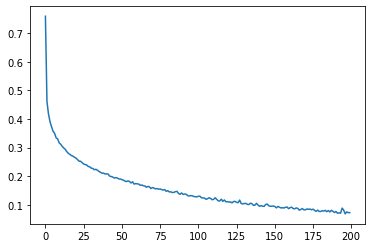

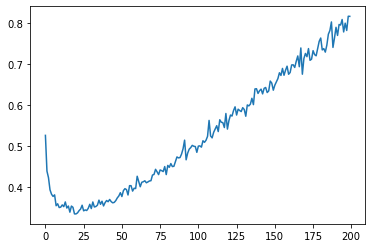

In [19]:
plt.figure(3)
plt.plot(history.history['loss'])
plt.figure(4)
plt.plot(history.history['val_loss'])

In [20]:
y_prediction=model2.predict(x=x_test,batch_size=200)
y_prediction=np.argmax(y_prediction, axis=1)
y_prediction=tf.keras.utils.to_categorical(y_prediction, num_classes=10, dtype="float32")
print("Accuracy score:", accuracy_score(y_test, y_prediction),"\n","Confusion Matrix:",confusion_matrix(y_test.argmax(axis=1), y_prediction.argmax(axis=1)))

Accuracy score: 0.8608 
 Confusion Matrix: [[790   3  13  23   1   2 162   0   6   0]
 [  4 966   1  22   2   0   4   0   1   0]
 [ 15   4 763  24  93   2  97   0   2   0]
 [ 41  12  15 860  22   3  38   0   8   1]
 [  3   1  96  52 764   1  79   0   4   0]
 [  0   0   0   2   0 944   0  35   3  16]
 [116   0  71  29  71   0 701   1  10   1]
 [  0   0   0   0   0  26   0 941   1  32]
 [ 12   2   6   3   1   8  23   7 938   0]
 [  0   0   0   1   0  21   1  36   0 941]]


CNN

In [8]:
model3 = tf.keras.Sequential(name="CNN")
model3.add(tf.keras.layers.Conv2D(16,3,input_shape=(28, 28, 1),activation="relu"))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 26, 26, 16)


In [9]:
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 13, 13, 16)


In [10]:
model3.add(tf.keras.layers.Conv2D(16,3,input_shape=(28, 28, 1),activation="relu"))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 11, 11, 16)


In [11]:
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 5, 5, 16)


In [13]:
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(32, activation="relu", name="Dense_32"))
print("model3 shape:", model3.output_shape)

model3 shape: (None, 32)


In [15]:
model3.add(tf.keras.layers.Dense(10,activation="softmax",name="Softmax_10_2"))
print("model3 shape:", model3.output_shape)

model3 shape: (None, 10)


In [16]:
model3.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
Dense_32 (Dense)             (None, 32)                12832     
_________________________________________________________________
Softmax_10_2 (Dense)         (None, 10)                330     

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)
model3.compile(optimizer=opt, loss="categorical_crossentropy")
history=model3.fit(x=x_train,y=y_train,epochs=200,batch_size=200,validation_data=(x_validation,y_validation))

In [ ]:
plt.figure(5)
plt.plot(history.history['loss'])
plt.figure(6)
plt.plot(history.history['val_loss'])

In [ ]:
y_prediction=model3.predict(x=x_test,batch_size=200)
y_prediction=np.argmax(y_prediction, axis=1)
y_prediction=tf.keras.utils.to_categorical(y_prediction, num_classes=10, dtype="float32")
print("Accuracy score:", accuracy_score(y_test, y_prediction),"\n","Confusion Matrix:",confusion_matrix(y_test.argmax(axis=1), y_prediction.argmax(axis=1)))